In [3]:
# Import packages

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, plot_confusion_matrix,\
    precision_score, recall_score, accuracy_score, f1_score, log_loss,\
    roc_curve, roc_auc_score, classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn import tree

pd.set_option("display.max_columns", 100)

In [4]:
df = pd.read_csv('test_features.txt')
target = pd.read_csv('training_set_labels.txt')
df2 = pd.read_csv('training_features.txt')

In [5]:
df

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,35 - 44 Years,College Graduate,Hispanic,Female,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,4.0,1.0,1.0,18 - 34 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,5.0,4.0,2.0,5.0,4.0,4.0,55 - 64 Years,College Graduate,White,Male,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,4.0,2.0,2.0,4.0,4.0,2.0,65+ Years,12 Years,White,Female,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,2.0,4.0,4.0,4.0,2.0,35 - 44 Years,12 Years,Black,Female,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26703,53410,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,NaN,4.0,2.0,2.0,4.0,2.0,1.0,35 - 44 Years,NaN,White,Female,NaN,NaN,NaN,NaN,dqpwygqj,"MSA, Principle City",1.0,1.0,NaN,NaN
26704,53411,3.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,1.0,1.0,5.0,2.0,2.0,18 - 34 Years,12 Years,White,Male,Below Poverty,Married,Rent,Employed,qufhixun,Non-MSA,1.0,3.0,fcxhlnwr,vlluhbov
26705,53412,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,3.0,1.0,4.0,3.0,1.0,18 - 34 Years,Some College,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,qufhixun,"MSA, Not Principle City",1.0,0.0,NaN,NaN
26706,53413,3.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,2.0,3.0,4.0,4.0,3.0,2.0,55 - 64 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,bhuqouqj,"MSA, Not Principle City",1.0,0.0,NaN,NaN


In [6]:
target

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0
...,...,...,...
26702,26702,0,0
26703,26703,0,0
26704,26704,0,1
26705,26705,0,0


In [7]:
df2

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,1.0,1.0,5.0,2.0,2.0,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,4.0,2.0,2.0,5.0,1.0,1.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,4.0,4.0,2.0,5.0,4.0,2.0,55 - 64 Years,Some College,White,Female,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,18 - 34 Years,Some College,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26708 entries, 0 to 26707
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26708 non-null  int64  
 1   h1n1_concern                 26623 non-null  float64
 2   h1n1_knowledge               26586 non-null  float64
 3   behavioral_antiviral_meds    26629 non-null  float64
 4   behavioral_avoidance         26495 non-null  float64
 5   behavioral_face_mask         26689 non-null  float64
 6   behavioral_wash_hands        26668 non-null  float64
 7   behavioral_large_gatherings  26636 non-null  float64
 8   behavioral_outside_home      26626 non-null  float64
 9   behavioral_touch_face        26580 non-null  float64
 10  doctor_recc_h1n1             24548 non-null  float64
 11  doctor_recc_seasonal         24548 non-null  float64
 12  chronic_med_condition        25776 non-null  float64
 13  child_under_6_mo

In [9]:
target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   respondent_id     26707 non-null  int64
 1   h1n1_vaccine      26707 non-null  int64
 2   seasonal_vaccine  26707 non-null  int64
dtypes: int64(3)
memory usage: 626.1 KB


In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [11]:
# Check to see the percentage breakdown of the distribution.
target['h1n1_vaccine'].value_counts(normalize=True)

0    0.787546
1    0.212454
Name: h1n1_vaccine, dtype: float64

In [12]:
# Same with the 'seasonal vaccine':
target['seasonal_vaccine'].value_counts(normalize=True)

0    0.534392
1    0.465608
Name: seasonal_vaccine, dtype: float64

()

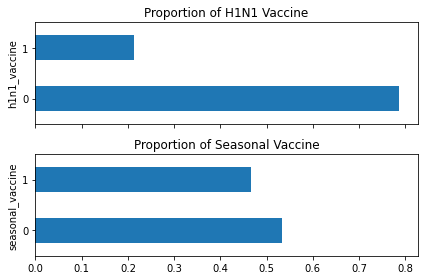

In [13]:
fig, ax = plt.subplots(2, 1, sharex=True)

n_obs = target.shape[0]

(target['h1n1_vaccine']
    .value_counts()
    .div(n_obs)
    .plot.barh(title="Proportion of H1N1 Vaccine", ax=ax[0])
)
ax[0].set_ylabel("h1n1_vaccine")

(target['seasonal_vaccine']
    .value_counts()
    .div(n_obs)
    .plot.barh(title="Proportion of Seasonal Vaccine", ax=ax[1])
)
ax[1].set_ylabel("seasonal_vaccine")

fig.tight_layout()
/

In [14]:
# Wanted to see if the ID numers are organized in numerical order. Looks like they are
target['respondent_id'].describe()

count    26707.000000
mean     13353.000000
std       7709.791156
min          0.000000
25%       6676.500000
50%      13353.000000
75%      20029.500000
max      26706.000000
Name: respondent_id, dtype: float64

In [15]:
# Are there any duplicates?
target['respondent_id'].duplicated().sum()

0

In [27]:
# Merge the df and target dataframes together to creat merged_df
merged_df = df2.merge(target, on='respondent_id')
# Check the new dataframe
merged_df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [28]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [29]:
merged_df['respondent_id'].duplicated().sum()

0

In [30]:
merged_df['age_group'].value_counts()

65+ Years        6843
55 - 64 Years    5563
45 - 54 Years    5238
18 - 34 Years    5215
35 - 44 Years    3848
Name: age_group, dtype: int64

In [31]:
# Need to verify the 0 value for household adults, see what this actually means
# Found out it's number of "other" household adults so we're good
merged_df['household_adults'].value_counts()

1.0    14474
0.0     8056
2.0     2803
3.0     1125
Name: household_adults, dtype: int64

In [32]:
merged_df['household_children'].value_counts()

0.0    18672
1.0     3175
2.0     2864
3.0     1747
Name: household_children, dtype: int64

In [33]:
merged_df['employment_industry'].value_counts()

fcxhlnwr    2468
wxleyezf    1804
ldnlellj    1231
pxcmvdjn    1037
atmlpfrs     926
arjwrbjb     871
xicduogh     851
mfikgejo     614
vjjrobsf     527
rucpziij     523
xqicxuve     511
saaquncn     338
cfqqtusy     325
nduyfdeo     286
mcubkhph     275
wlfvacwt     215
dotnnunm     201
haxffmxo     148
msuufmds     124
phxvnwax      89
qnlwzans      13
Name: employment_industry, dtype: int64

In [34]:
merged_df['hhs_geo_region'].value_counts()

lzgpxyit    4297
fpwskwrf    3265
qufhixun    3102
oxchjgsf    2859
kbazzjca    2858
bhuqouqj    2846
mlyzmhmf    2243
lrircsnp    2078
atmpeygn    2033
dqpwygqj    1126
Name: hhs_geo_region, dtype: int64

In [36]:
# Dropping employment_industry, employment_occupation, and hss_geo_region.

merged_df = merged_df.drop(columns=['employment_occupation', 'employment_industry', 'hhs_geo_region'])
merged_df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,census_msa,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0,0


In [37]:
# Checking the new dataframe without those three columns that were dropped.
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [38]:
merged_df['health_insurance'].value_counts()

1.0    12697
0.0     1736
Name: health_insurance, dtype: int64

In [39]:
# Dropping missing values from 'health_insurance'.
merged_df = merged_df.dropna(subset=['health_insurance'])
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14433 entries, 0 to 26706
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                14433 non-null  int64  
 1   h1n1_concern                 14383 non-null  float64
 2   h1n1_knowledge               14359 non-null  float64
 3   behavioral_antiviral_meds    14386 non-null  float64
 4   behavioral_avoidance         14329 non-null  float64
 5   behavioral_face_mask         14422 non-null  float64
 6   behavioral_wash_hands        14415 non-null  float64
 7   behavioral_large_gatherings  14380 non-null  float64
 8   behavioral_outside_home      14384 non-null  float64
 9   behavioral_touch_face        14364 non-null  float64
 10  doctor_recc_h1n1             14069 non-null  float64
 11  doctor_recc_seasonal         14069 non-null  float64
 12  chronic_med_condition        14300 non-null  float64
 13  child_under_6_mo

In [40]:
# Dropping remaining missing data in the dataframe.
merged_df = merged_df.dropna()

In [41]:
# Sanity check.
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11794 entries, 0 to 26706
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                11794 non-null  int64  
 1   h1n1_concern                 11794 non-null  float64
 2   h1n1_knowledge               11794 non-null  float64
 3   behavioral_antiviral_meds    11794 non-null  float64
 4   behavioral_avoidance         11794 non-null  float64
 5   behavioral_face_mask         11794 non-null  float64
 6   behavioral_wash_hands        11794 non-null  float64
 7   behavioral_large_gatherings  11794 non-null  float64
 8   behavioral_outside_home      11794 non-null  float64
 9   behavioral_touch_face        11794 non-null  float64
 10  doctor_recc_h1n1             11794 non-null  float64
 11  doctor_recc_seasonal         11794 non-null  float64
 12  chronic_med_condition        11794 non-null  float64
 13  child_under_6_mo

In [42]:
merged_df['race'].value_counts()

White                9457
Black                 910
Hispanic              742
Other or Multiple     685
Name: race, dtype: int64

In [43]:
merged_df['sex'].value_counts()

Female    6997
Male      4797
Name: sex, dtype: int64

In [44]:
merged_df['income_poverty'].value_counts(normalize=True)

<= $75,000, Above Poverty    0.572325
> $75,000                    0.307699
Below Poverty                0.119976
Name: income_poverty, dtype: float64

In [45]:
merged_df['education'].value_counts()

College Graduate    4802
Some College        3363
12 Years            2644
< 12 Years           985
Name: education, dtype: int64

In [46]:
race_white = merged_df[merged_df.race == 'White']
print(race_white['education'].value_counts())
print(race_white['income_poverty'].value_counts())
print(race_white['sex'].value_counts())
print(race_white['age_group'].value_counts())

College Graduate    4095
Some College        2710
12 Years            2086
< 12 Years           566
Name: education, dtype: int64
<= $75,000, Above Poverty    5570
> $75,000                    3110
Below Poverty                 777
Name: income_poverty, dtype: int64
Female    5638
Male      3819
Name: sex, dtype: int64
65+ Years        2401
55 - 64 Years    2175
45 - 54 Years    1928
18 - 34 Years    1667
35 - 44 Years    1286
Name: age_group, dtype: int64


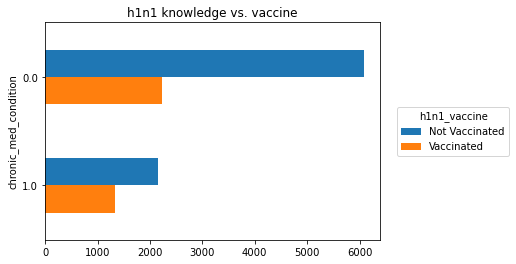

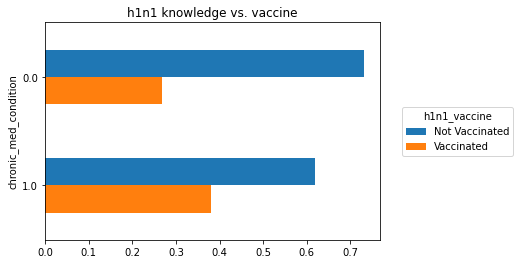

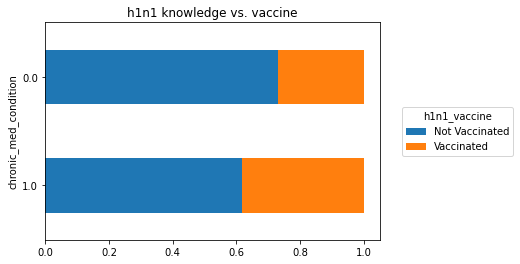

In [47]:
# This shows chronic medical condition VS h1n1 vaccine.
counts = (merged_df[['chronic_med_condition', 'h1n1_vaccine']]
              .groupby(['chronic_med_condition', 'h1n1_vaccine'])
              .size()
              .unstack('h1n1_vaccine')
         )
counts
ax = counts.plot.barh()
ax.invert_yaxis()
ax.legend(['Not Vaccinated','Vaccinated'],
    loc='center right', 
    bbox_to_anchor=(1.4, 0.5), 
    title='h1n1_vaccine')
ax.set_title('h1n1 knowledge vs. vaccine')

h1n1_knowledge_counts = counts.sum(axis='columns')
h1n1_knowledge_counts
fbar = counts.div(h1n1_knowledge_counts, axis='index')
fbar
ax = fbar.plot.barh()
ax.invert_yaxis()
ax.legend(['Not Vaccinated','Vaccinated'],
    loc='center left', 
    bbox_to_anchor=(1.05, 0.5),
    title='h1n1_vaccine'
)
ax.set_title('h1n1 knowledge vs. vaccine')
ax = fbar.plot.barh(stacked=True)
ax.invert_yaxis()
ax.legend(['Not Vaccinated','Vaccinated'],
    loc='center left', 
    bbox_to_anchor=(1.05, 0.5),
    title='h1n1_vaccine'
)
ax.set_title('h1n1 knowledge vs. vaccine');


Text(0.5, 1.0, 'Race vs Vaccination')

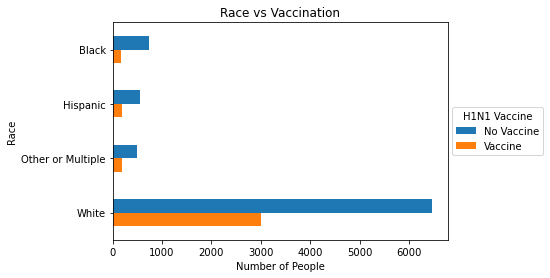

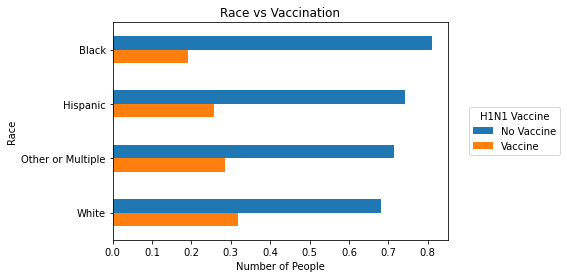

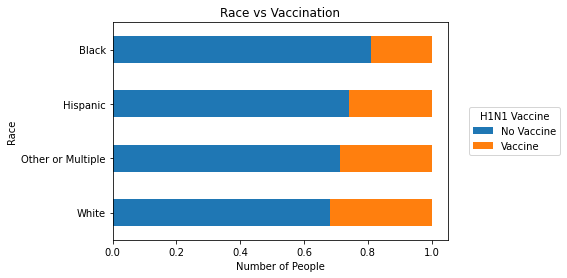

In [48]:
# These graphs show Race VS H1N1 Vaccine.
counts2 = (merged_df[['race', 'h1n1_vaccine']]
              .groupby(['race', 'h1n1_vaccine'])
              .size()
              .unstack('h1n1_vaccine')
         )
counts2
ax = counts2.plot.barh()
ax.invert_yaxis()
ax.legend(['No Vaccine','Vaccine'],
    loc='center right', 
    bbox_to_anchor=(1.3, 0.5), 
    title='H1N1 Vaccine'
)
ax.set_ylabel('Race')
ax.set_xlabel('Number of People')
ax.set_title('Race vs Vaccination')
plt.savefig('race.png', bbox_inches='tight', dpi=300)
race1 = counts2.sum(axis='columns')
race1
d_race = counts2.div(race1, axis='index')
d_race
ax = d_race.plot.barh()
ax.invert_yaxis()
ax.legend(['No Vaccine','Vaccine'],
    loc='center left', 
    bbox_to_anchor=(1.05, 0.5),
    title='H1N1 Vaccine'
)
ax.set_ylabel('Race')
ax.set_xlabel('Number of People')
ax.set_title('Race vs Vaccination')
ax = d_race.plot.barh(stacked=True)
ax.invert_yaxis()
ax.legend(['No Vaccine','Vaccine'],
    loc='center left', 
    bbox_to_anchor=(1.05, 0.5),
    title='H1N1 Vaccine'
)
ax.set_ylabel('Race')
ax.set_xlabel('Number of People')
ax.set_title('Race vs Vaccination')


In [49]:
test_df=merged_df[['race', 'h1n1_vaccine']]
test_df

,race,h1n1_vaccine
0,White,0
1,White,0
7,White,1
9,White,0
10,White,1
...,...,...
26697,White,0
26699,White,0
26701,White,0
26703,White,0


In [50]:
test_df1 = test_df.value_counts().to_frame('values').reset_index()
test_df1

,race,h1n1_vaccine,values
0,White,0,6456
1,White,1,3001
2,Black,0,737
3,Hispanic,0,551
4,Other or Multiple,0,489
5,Other or Multiple,1,196
6,Hispanic,1,191
7,Black,1,173


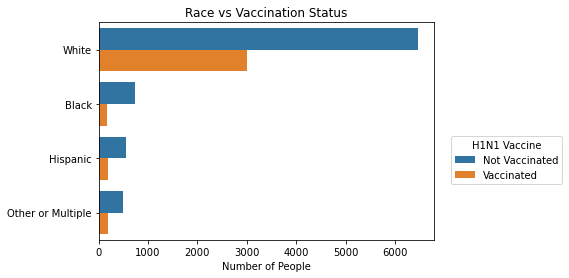

In [51]:
ax=sns.barplot(data=test_df1, x='values', y='race', hue='h1n1_vaccine', palette= 'tab10')
ax.set_ylabel('')
ax.set_xlabel('Number of People')
ax.set_title('Race vs Vaccination Status')

#ax.legend(['Not Vaccinated', 'Vaccinated'], title = 'H1N1 Vaccine',
#         bbox_to_anchor=(1.4, 0.5));

labels=['Not Vaccinated', 'Vaccinated']
h, l = ax.get_legend_handles_labels()
ax.legend(h, labels, title='H1N1 Vaccine', bbox_to_anchor=(1.4, 0.5));
plt.savefig('race.png', bbox_inches='tight', dpi=300)

Text(0.5, 1.0, 'Age Groups vs Vaccination')

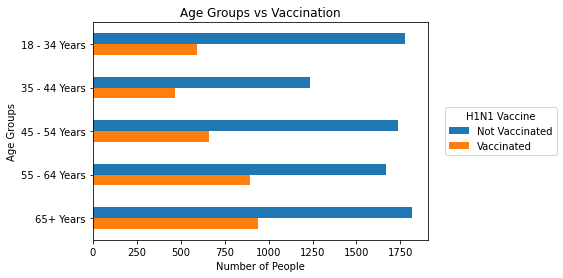

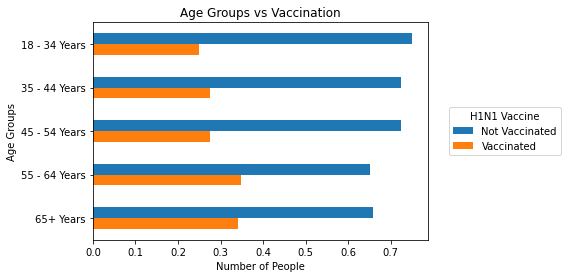

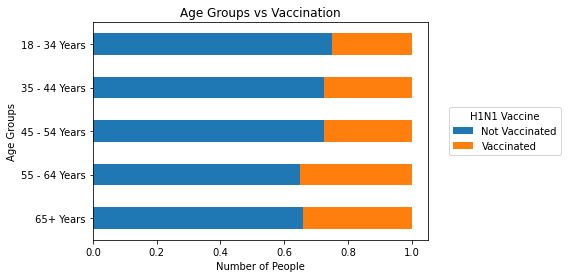

In [52]:
# This shows the breakdown of Age Group VS H1N1 Vaccine
counts3 = (merged_df[['age_group', 'h1n1_vaccine']]
              .groupby(['age_group', 'h1n1_vaccine'])
              .size()
              .unstack('h1n1_vaccine'))
counts3
ax = counts3.plot.barh()
ax.invert_yaxis()
ax.legend(['Not Vaccinated','Vaccinated'],
    loc='center right', 
    bbox_to_anchor=(1.4, 0.5), 
title='H1N1 Vaccine'
)
ax.set_ylabel('Age Groups')
ax.set_xlabel('Number of People')
ax.set_title('Age Groups vs Vaccination')
plt.savefig('ages.png', bbox_inches='tight', dpi=300)
age_group1 = counts3.sum(axis='columns')
age_group1
ags1 = counts3.div(age_group1, axis='index')
ags1
ax = ags1.plot.barh()
ax.invert_yaxis()
ax.legend(['Not Vaccinated','Vaccinated'],
    loc='center left', 
    bbox_to_anchor=(1.05, 0.5),
    title='H1N1 Vaccine'
)
ax.set_ylabel('Age Groups')
ax.set_xlabel('Number of People')
ax.set_title('Age Groups vs Vaccination')
ax = ags1.plot.barh(stacked=True)
ax.invert_yaxis()
ax.legend(['Not Vaccinated','Vaccinated'],
    loc='center left', 
    bbox_to_anchor=(1.05, 0.5),
    title='H1N1 Vaccine'
)
ax.set_ylabel('Age Groups')
ax.set_xlabel('Number of People')
ax.set_title('Age Groups vs Vaccination')

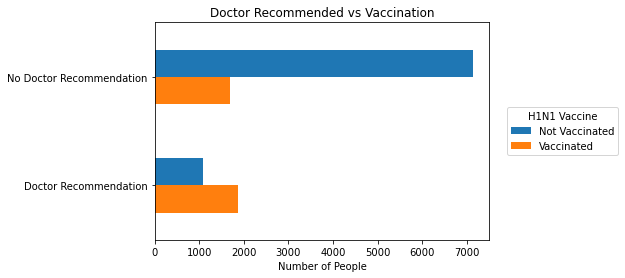

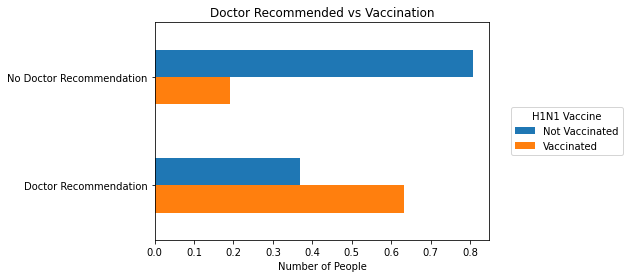

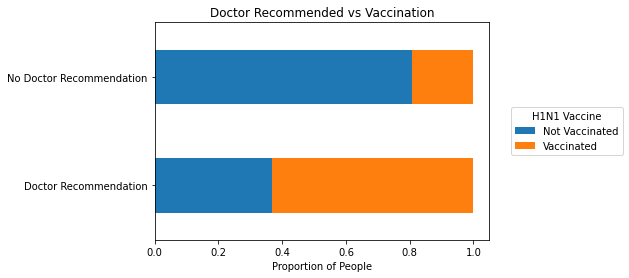

In [53]:
# This shows Doctor Recommended VS H1N1 Vaccine.
counts4 = (merged_df[['doctor_recc_h1n1', 'h1n1_vaccine']]
              .groupby(['doctor_recc_h1n1', 'h1n1_vaccine'])
              .size()
              .unstack('h1n1_vaccine')
         )
counts4
ax = counts4.plot.barh()
ax.invert_yaxis()
ax.legend(['Not Vaccinated','Vaccinated'],
    loc='center right', 
    bbox_to_anchor=(1.4, 0.5), 
    title='H1N1 Vaccine'
)
a=ax.get_yticks().tolist()
a[0]='No Doctor Recommendation'
a[1]='Doctor Recommendation'
ax.set_yticklabels(a)
ax.set_ylabel('')
ax.set_xlabel('Number of People')
ax.set_title('Doctor Recommended vs Vaccination')
plt.savefig('docrec2.png', bbox_inches='tight', dpi=300)
h_ins = counts4.sum(axis='columns')
h_ins
ins = counts4.div(h_ins, axis='index')
ins
ax = ins.plot.barh()
ax.invert_yaxis()
ax.legend(['Not Vaccinated','Vaccinated'],
    loc='center left', 
    bbox_to_anchor=(1.05, 0.5),
    title='H1N1 Vaccine'
)
a=ax.get_yticks().tolist()
a[0]='No Doctor Recommendation'
a[1]='Doctor Recommendation'
ax.set_yticklabels(a)
ax.set_ylabel('')
ax.set_xlabel('Number of People')
ax.set_title('Doctor Recommended vs Vaccination')

ax = ins.plot.barh(stacked=True)
ax.invert_yaxis()
ax.legend(['Not Vaccinated','Vaccinated'],
    loc='center left', 
    bbox_to_anchor=(1.05, 0.5),
    title='H1N1 Vaccine'
)
a=ax.get_yticks().tolist()
a[0]='No Doctor Recommendation'
a[1]='Doctor Recommendation'
ax.set_yticklabels(a)
ax.set_ylabel('')
ax.set_xlabel('Proportion of People')
ax.set_title('Doctor Recommended vs Vaccination')
plt.savefig('docrec.png', bbox_inches='tight', dpi=300)


Text(0.5, 1.0, 'Income vs Vaccination')

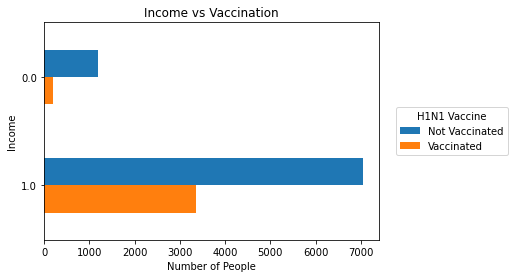

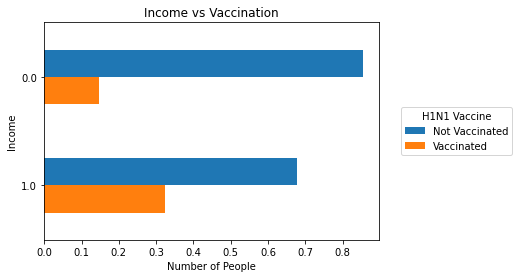

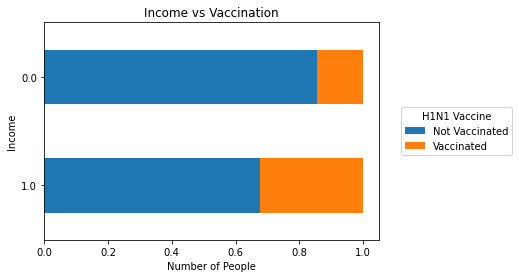

In [54]:
# This shows Health Insurance VS H1N1 Vaccine.
counts5 = (merged_df[['health_insurance', 'h1n1_vaccine']]
              .groupby(['health_insurance', 'h1n1_vaccine'])
              .size()
              .unstack('h1n1_vaccine')
         )
counts5
ax = counts5.plot.barh()
ax.invert_yaxis()
ax.legend(['Not Vaccinated','Vaccinated'],
    loc='center right', 
    bbox_to_anchor=(1.4, 0.5), 
    title='H1N1 Vaccine'
)
ax.set_ylabel('Income')
ax.set_xlabel('Number of People')
ax.set_title('Income vs Vaccination')
plt.savefig('income.png', bbox_inches='tight', dpi=300)
income = counts5.sum(axis='columns')
income
p_income = counts5.div(income, axis='index')
p_income
ax = p_income.plot.barh()
ax.invert_yaxis()
ax.legend(['Not Vaccinated','Vaccinated'],
    loc='center left', 
    bbox_to_anchor=(1.05, 0.5),
    title='H1N1 Vaccine'
)
ax.set_ylabel('Income')
ax.set_xlabel('Number of People')
ax.set_title('Income vs Vaccination')
ax = p_income.plot.barh(stacked=True)
ax.invert_yaxis()
ax.legend(['Not Vaccinated','Vaccinated'],
    loc='center left', 
    bbox_to_anchor=(1.05, 0.5),
    title='H1N1 Vaccine'
)
ax.set_ylabel('Income')
ax.set_xlabel('Number of People')
ax.set_title('Income vs Vaccination')